## Hands-on implementation of OPTICS in clustering

DBSCAN fails when there are clusters with varying density and high dimensional data. 

To overcome this problem the OPTICS which extension of the DBSCAN uses two additional parameters that are core distance and reachability distance. The core distance is the minimum value of radius used to classify a given point as a core point and the reachability distance, for low reachability, the point will belong to the particular cluster.  

Similar to the DBSCAN, OPTICS can also detect outliers or noise and assigns them as - 1. So to deal with this density-based algorithm we will implement it on Synthetic data. The synthetic data are used to replicate the densely distributed data. 

####  Create and visualize synthetic data 

In the very first step, we will create the synthetic data using sklearn’s make_blob function which will create isotropic Gausssien blobs for the clustering problems as shown below.

In [1]:
# Load the data
from sklearn.datasets import make_blobs

# Create blobs
X,_ = make_blobs(n_samples=1500, n_features=3, centers=3, cluster_std=1.5, random_state=40)

The X holds the generated samples and features where y holds the growth truth cluster for each data point. Now let’s take look at the distribution of data points using a scatter plot.

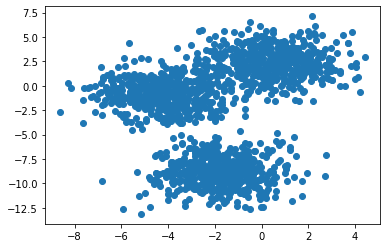

In [2]:
import matplotlib.pyplot as plt

# Check the distribution
plt.scatter(X[:,0],X[:,1])

From the above distribution, we can easily observe that there are two clusters with some outliers.

#### Identify Input features

`make_blobs` returns the X and y values. The X consists of the main data that consists of features of data points. Let’s take look at those points.

In [3]:
# Check the features
X[:10]

array([[-3.16061842, -1.20434404, -2.95625149],
       [-1.00579044,  1.38902779,  3.92600972],
       [-4.48597776, -1.85230396, -2.18706173],
       [ 0.88989967,  2.91208238,  5.07578208],
       [-4.93622062, -3.36453113, -1.12226125],
       [-1.52411863, -9.04805234,  7.75689431],
       [-1.37803111,  0.25567437, -3.53566883],
       [-3.06449293,  0.51061156, -6.1987134 ],
       [ 2.39746687,  2.8475443 ,  7.11713668],
       [-1.05691761,  4.56703351,  2.99307713]])

#### Initializing and training the OPTICS

Now we will import and initialize the OPTICS algorithm from the sklearn library and will train it on the input patterns shown above.

In [4]:
# Import OPTICS from sklearn
from sklearn.cluster import OPTICS

There are a couple of parameters that we need to set, those are min_samples which is used to specify the number of points to be considered in clustering, xi used to specify the steepness on the reachability plot and min_cluster_size specifies the minimum size of the incremental cluster.  

In [5]:
# Initialize OPTICS
density_cluster = OPTICS(min_samples=100, xi=0.02, min_cluster_size=0.1)

Now we can train the OPTICS just by calling the .fit method. 

In [6]:
# Train Optics
density_cluster.fit(X)

OPTICS(min_cluster_size=0.1, min_samples=100, xi=0.02)

#### Predicting and plotting the clusters 

We have successfully trained the OPTICS and now let’s see how cluster labels have been generated on training patterns.  

In [8]:
import pandas as pd

# predicted result
data = pd.DataFrame(X)
data['labels'] = density_cluster.labels_

Here first we try to understand the labels that the algorithm has assigned to our data.

In [9]:
# clusters labels
data['labels'].value_counts()

 0    503
 1    498
 2    498
-1      1
Name: labels, dtype: int64

From the above, OPTICS has successfully identified the two clusters and those are labelled as 0 and 1. Also, it has classified one data point as an outlier.

Now finally we will plot this cluster using a scatter plot.

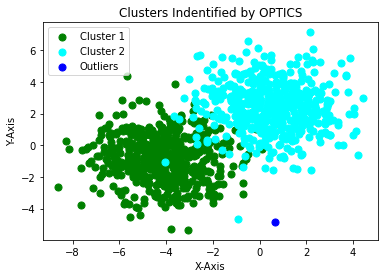

In [10]:
# Plot the clusteers
plt.scatter(X[data['labels']  == 0, 0], X[data['labels']  == 0, 1], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[data['labels']  == 1, 0], X[data['labels']  == 1, 1], s = 50, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[data['labels']  == -1, 0], X[data['labels']  == -1, 1], s = 50, c = 'blue', label = 'Outliers')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Clusters Indentified by OPTICS')
plt.legend()

In the above data points represented in cyan, green and blue coloured dots are the clusters and the red one is the noise.

So this is how we can address the clustering problem using the OPTICS algorithm.